In [1]:

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import random 
import sys
sys.path.append('./lib')
from lib.cleaning import *
from lib.data_prepration import *
from lib.paralellism import *
from lib.mydoc2vec import *
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import nltk

from gensim.models import Doc2Vec
from collections import namedtuple
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
#!pip install scipy==1.12
SEED = 448

[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Users\alire\Downloads\neuefische\ds-
[nltk_data]     capstone\.venv\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
file_path = '../data/one_percent_books.csv'
data_prep = DataPreparation(file_path)
data_prep.clean_and_preprocess(True)
data_prep.Normalize()
df=data_prep.data
df

,title,price,helpfulness,score,time,summary,text,description,authors,publisher,publisheddate,categories,ratingscount
0,the hobbit or there and back again,21.296901,1.0,5.0,2000-07-08,great.,the first time i read this book was when i was...,celebrating 75 years of one of the world's mos...,[J. R. R. Tolkien],mariner books,2012-01-01,[Juvenile Fiction],2580.000000
2,god's name in vain : the wrongs and rights of ...,21.296901,,4.0,2010-03-02,"a voice worth listening to, but one which need...",this is the first non-fiction i've read by ste...,stephen carter argues that american politics i...,[Stephen Carter],basic books,2012-01-01,[Political Science],261.457603
3,the catcher in the rye [audiobook] [cd] [unabr...,21.296901,,5.0,1999-04-14,easy book with a lot of meaning behind it,i read the catcher in the rye a while ago and ...,i’ll get there. it better be worth the trip. i...,[John Donovan],"north star editions, inc.",2012-01-01,[Young Adult Fiction],3.000000
4,east of eden,21.296901,0.0,5.0,2007-01-30,one of the best books ever written...,"this is, in my eyes, steinbeck's great america...","this sprawling and often brutal novel, set in ...",[John Steinbeck],,1988-01-01,[Brothers],198.000000
5,the downing street years,21.296901,1.0,5.0,2003-05-27,no rust on the iron lady,this book is one of the most interesting polit...,this first volume of margaret thatcher's memoi...,[Margaret Thatcher],harper collins,1988-01-01,[Biography & Autobiography],2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,harper lee's to kill a mockingbird (barron's b...,21.296901,0.5,5.0,2007-08-24,great book,i love this book it great literature book i ne...,"a guide to reading ""to kill a mockingbird"" wit...","[Joyce Milton, Harper Lee]",turtleback books,2005-01-01,[Juvenile Nonfiction],261.457603
29994,the black arrow: a tale of the two roses,21.296901,0.444444,3.0,2004-11-04,good,this is a good book but not the best of steven...,this book contains robert louis stevenson’s 18...,[Robert Louis Stevenson],read books ltd,2005-01-01,[Fiction],261.457603
29996,"nicolae: left behind, volume 3",21.296901,0.0,1.0,2012-06-25,should rate zero stars,i was flying to europe and i needed something ...,continues the story of the tribulation force a...,"[Tim LaHaye, Jerry B. Jenkins]","tyndale house publishers, inc.",2005-01-01,[Fiction],36.000000
29997,unfit for command: swift boat veterans speak o...,21.296901,0.736842,5.0,2004-08-22,must read for all voters,"loved the book, well done by all the veterans ...",the must-read summary of john e. o’neill and j...,[BusinessNews Publishing],primento,2005-01-01,[Political Science],261.457603


In [6]:
df.columns

Index(['title', 'price', 'helpfulness', 'score', 'time', 'summary', 'text',
       'description', 'authors', 'publisher', 'publisheddate', 'categories',
       'ratingscount'],
      dtype='object')

In [7]:
print(len(df))
print(df.info())
print(df.describe())

23556
<class 'pandas.core.frame.DataFrame'>
Index: 23556 entries, 0 to 29998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          23556 non-null  object        
 1   price          23556 non-null  float64       
 2   helpfulness    23556 non-null  object        
 3   score          23556 non-null  float64       
 4   time           23556 non-null  datetime64[ns]
 5   summary        23556 non-null  object        
 6   text           23556 non-null  object        
 7   description    23556 non-null  object        
 8   authors        23556 non-null  object        
 9   publisher      23556 non-null  object        
 10  publisheddate  23556 non-null  datetime64[ns]
 11  categories     23556 non-null  object        
 12  ratingscount   23556 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(8)
memory usage: 2.5+ MB
None
              price         score                

In [8]:
df.isnull().sum()

title            0
price            0
helpfulness      0
score            0
time             0
summary          0
text             0
description      0
authors          0
publisher        0
publisheddate    0
categories       0
ratingscount     0
dtype: int64

In [9]:
df.score.value_counts()

score
5.0    14399
4.0     4483
3.0     1902
1.0     1548
2.0     1224
Name: count, dtype: int64

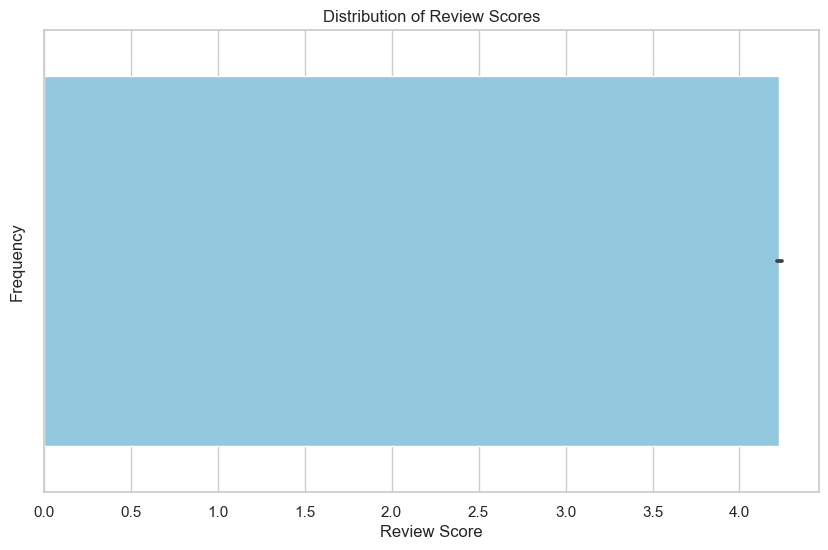

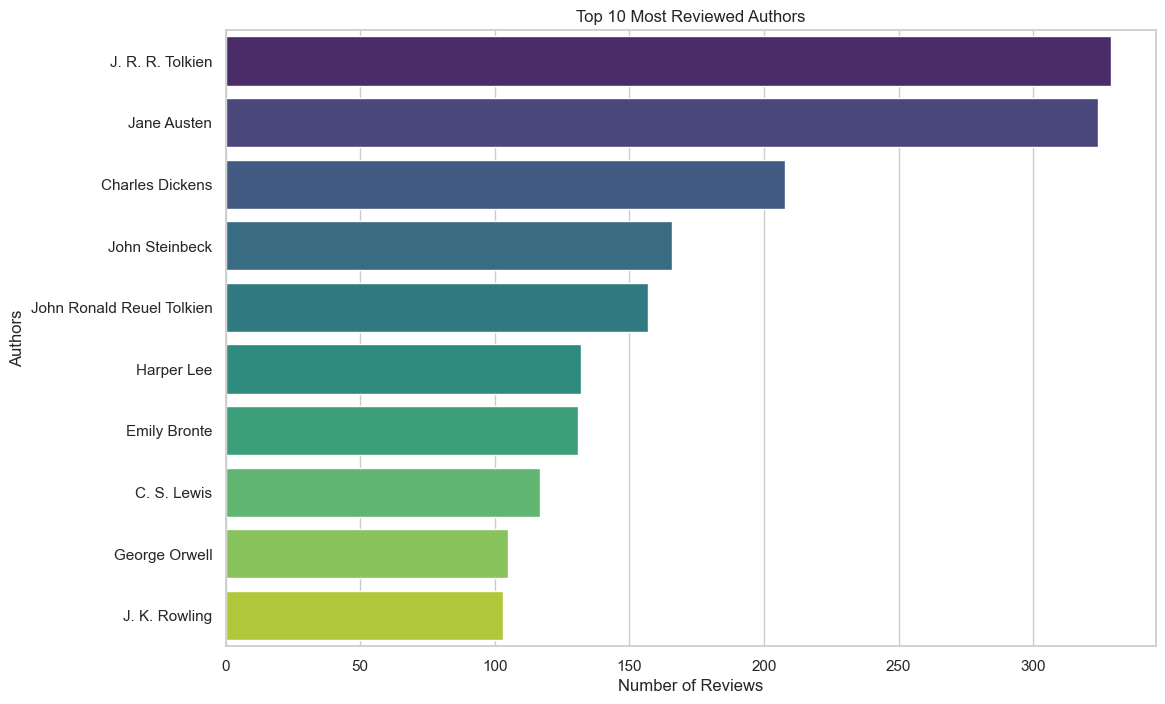

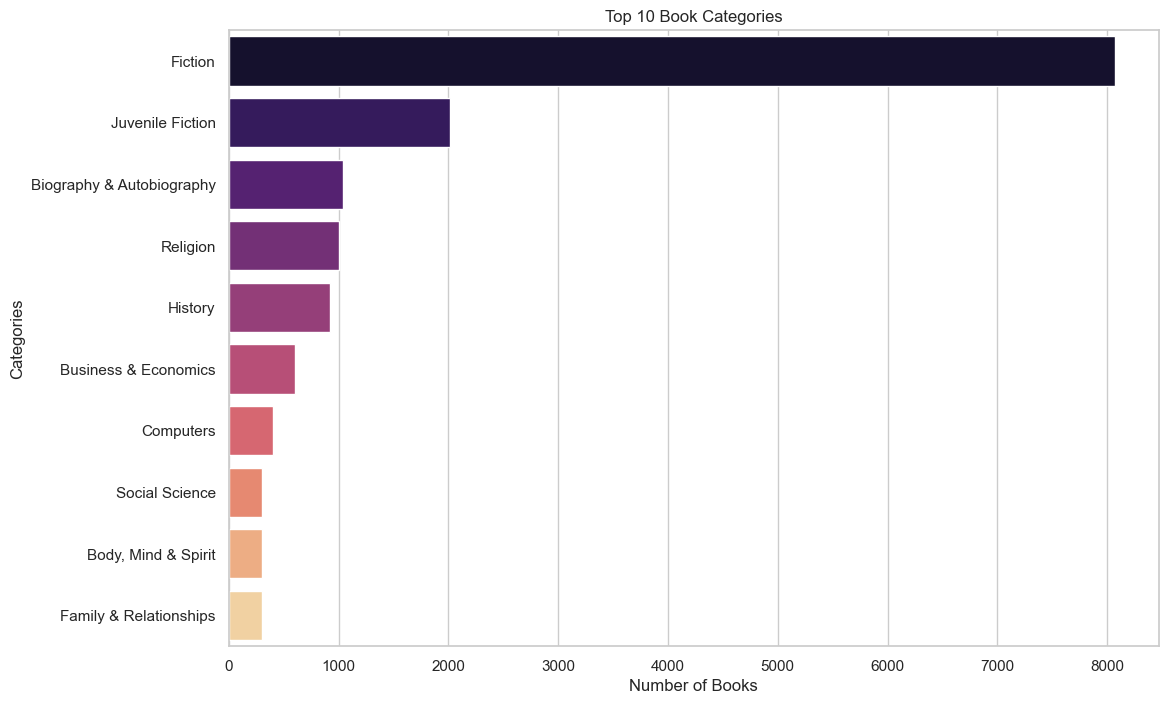

In [10]:
data_prep.generate_plots()

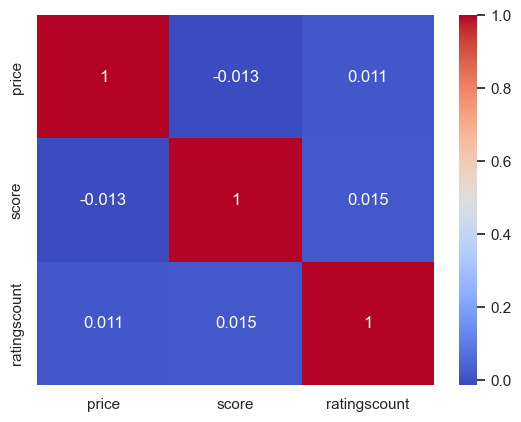

In [11]:
corr_matrix = data_prep.data.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
"""!python.exe -m pip install --upgrade pip 
!pip install nltk --upgrade
!pip install gensim --upgrade
!pip install scipy --upgrade"""

In [12]:
join_func = lambda x: ', '.join(map(str, x))
data_prep.data['all']=data_prep.data['title'] + data_prep.data['description'] + data_prep.data['authors'].apply(join_func)+ data_prep.data['categories'].apply(join_func)
data_prep.data['all']

0        the hobbit or there and back againcelebrating ...
2        god's name in vain : the wrongs and rights of ...
3        the catcher in the rye [audiobook] [cd] [unabr...
4        east of edenthis sprawling and often brutal no...
5        the downing street yearsthis first volume of m...
                               ...                        
29993    harper lee's to kill a mockingbird (barron's b...
29994    the black arrow: a tale of the two rosesthis b...
29996    nicolae: left behind, volume 3continues the st...
29997    unfit for command: swift boat veterans speak o...
29998    count of monte cristothe count of monte cristo...
Name: all, Length: 23556, dtype: object

In [ ]:

#tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data_prep.data['all'])]


In [13]:

pls=Parallelism(8)
pls.set_worker()

def preprocess_document(text):
  import nltk
  from nltk.tokenize import word_tokenize
  from nltk.corpus import stopwords
  tokens = word_tokenize(text.lower())
  cleaned_tokens = [word for word in tokens if word not in stopwords.words('english')]
  return cleaned_tokens
#preprocessed_documents = pls.do_paralell(data_prep.data,'all',preprocess_document)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [ ]:
my_doc2vec = MyDoc2VecClass()
my_doc2vec.train(data_prep.data)

In [ ]:
my_doc2vec.model.save("../data/doc2vec.model")


In [39]:
my_doc2vec_load = MyDoc2VecClass()
my_doc2vec_load.load_model(df)
search=data_prep.data.iloc[3].title
print(search+'\n')
for i in my_doc2vec_load.get_similar_indexs([search]):
    print(data_prep.data.iloc[i[0]].title)


east of eden

fire in my soul
farewell to manzanar
the mayor of macdougal street: a memoir
keeper of secrets: day one
studs lonigan: young lonigan, young manhood of studs lonigan, judgement day
gambito turco (spanish edition)
a son of the circus
artscape: an ike schwartz mystery (ike schwartz mysteries)
growing up spoiled in beverly hills
studs lonigan: young lonigan, young manhood of studs lonigan, judgement day
